Атомы водорода и кислорода в молекуле воды расположены в углах равнобедренного треугольника с длиной связи О-Н 0,0957 нм или 0,957 А (в вики 0.9584). Валентный угол Н-О-Н составляет 104°27

1 соответсвует водороду

2 соотвествует кислороду

Расстояние в ангстремах

In [1]:
import numpy as np

def getAtom(string):
    return [float(num) for num in string.split(' ')]

class Atom:
    """
    Класс атом, в которм содержатся атомы кислорода и водорода
    """
    bound_HO_left = 0.957 - 0.2
    bound_HO_right = 0.957 + 0.2
    
    
    def __init__(self, number, type_atom, x, y, z, a, b, c):
        """Constructor"""
        coordinates = [x*a, y*b, z*c]
        basis = [a, b, c]
        self.number = int(number)
        self.type_atom = int(type_atom)
        self.coordinates = coordinates
        self.bounded = None
        self.basis = basis
        self.count_bonds = 0
        
    def set_old_bound(self, atom_n):
        self.bounded = atom_n
    def set_old_num(self, atom_num):
        self.number = atom_num
        
    def lbound(self,atom_cor1, atom_cor2):
        lenght = 0
        for index, r in enumerate(self.basis):
            distance = abs(atom_cor2[index] - atom_cor1[index])
            if distance < r/2:
                lenght += distance**2
            else:
                lenght += (r - distance)**2
        return np.sqrt(lenght)

    def create_bound(self, atom):
        lenght = self.lbound(self.coordinates, atom.coordinates)
        if self.bound_HO_left < lenght < self.bound_HO_right:
            self.bounded = atom.number
            self.count_bonds += 1
            
    def create_bound_2(self, atom):
        lenght = self.lbound(self.coordinates, atom.coordinates)
        if self.bound_HO_left < lenght < self.bound_HO_right:
            if self.bounded == None:
                self.bounded = atom.number
            elif self.bounded != atom.number:
                global H_frame, count_frame, time, count_time
                #print(self.number, self.bounded, atom.number, count_frame)
                self.bounded = atom.number
                H_frame.append((count_frame, self.number))
                time.append(count_time)
                count_time = 0

In [2]:
import os

file = open('data.dmp')

text = file.readlines()

In [3]:
time, H_frame = [], []
count_time, count_frame = 0, 0
index_H = []
index_O = []

flag_start = True

hydrogens = []
oxygens = []

num_line = 0

while num_line < len(text) - 1:
    
    if text[num_line] == 'ITEM: TIMESTEP\n': # Начало фрейма
        count_time += 1
        count_frame += 1
        
        # Запись базиса 
        
        a = float(text[num_line+5].split(' ')[1]) 
        b = float(text[num_line+6].split(' ')[1])
        c = float(text[num_line+7].split(' ')[1])
        
        num_line += 9 # Пропуск титульной информации о фрейме
    
    # Подсчёт водородов и кислородов
    if flag_start:
        tup_ar = (*getAtom(text[num_line]), a, b, c)
        Atom1 = Atom(*getAtom(text[num_line]), a, b, c)
        if Atom1.type_atom == 1:
            hydrogens.append(Atom1)
            index_H.append(Atom1.number)
        else:
            oxygens.append(Atom1)
            index_O.append(Atom1.number)
    else:
        atom_inf = getAtom(text[num_line])
        numb_A = int(atom_inf[0])
        if atom_inf[1] == 1:
            prev = hydrogens[index_H.index(numb_A)]
            prev_bound = prev.bounded
            Atom1 = Atom(*getAtom(text[num_line]), a, b, c)
            Atom1.set_old_bound(prev_bound)
            hydrogens[index_H.index(numb_A)] = Atom1
        else:
            prev = oxygens[index_O.index(numb_A)]
            prev_bound = prev.bounded
            Atom1 = Atom(*getAtom(text[num_line]), a, b, c)
            Atom1.set_old_bound(prev_bound)
            oxygens[index_O.index(numb_A)] = Atom1
    
    num_line += 1 # Шаг по строке 
    
    if text[num_line] == 'ITEM: TIMESTEP\n': # Конец ФРЕЙМА
       
        # Пробегаемся по всем водородам в поисках того самого 
        # который перескочил с одного кислорода на другой
        
        if flag_start:
            flag_start = False
        
        for H in hydrogens:
            for O in oxygens:
                H.create_bound_2(O)

#     if count_frame >= 1000:
#         break

In [12]:
import csv

In [16]:
with open('H_frame.csv', 'w') as f:
    writer = csv.writer(f , lineterminator='\n')
    for tup in H_frame:
        writer.writerow(tup)

In [4]:
file_1 = open("mean.txt", "w")

file_1.write(', '.join([str(el) for el in time]))

file_1.close()

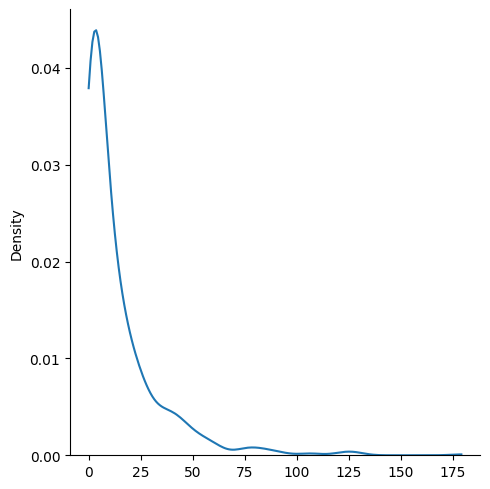

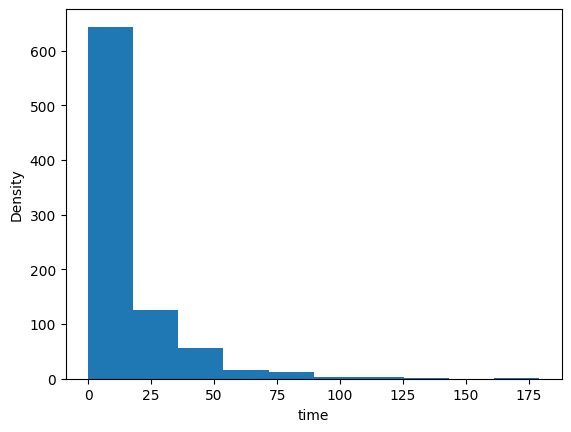

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(time, kind="kde", cut=0)
plt.show()
plt.savefig('smooth_hist.png')
plt.hist(time)
plt.xlabel('time')
plt.ylabel('Density')
plt.savefig('hist.png')
plt.show()

--------------------------

In [ ]:
# time, H_frame = [], []
# count_time, count_frame = 0, 0
# index_H = []
# index_O = []

# flag_start = True

# hydrogens = [None]
# oxygens = []

# num_line = 0

# while num_line < len(text):
    
#     if text[num_line] == 'ITEM: TIMESTEP\n': # Начало фрейма
#         count_time += 1
#         count_frame += 1
        
#         # Запись базиса 
        
#         a = float(text[num_line+5].split(' ')[1]) 
#         b = float(text[num_line+6].split(' ')[1])
#         c = float(text[num_line+7].split(' ')[1])
        
#         num_line += 9 # Пропуск титульной информации о фрейме
    
#     # Подсчёт водородов и кислородов
#     if flag_start:
#         tup_ar = (*getAtom(text[num_line]), a, b, c)
#         Atom1 = Atom(*getAtom(text[num_line]), a, b, c)
#         if Atom1.type_atom == 1:
#             hydrogens.append(Atom1)
#             index_H.append(Atom1.number)
#         else:
#             oxygens.append(Atom1)
#             index_O.append(Atom1.number)
#     else:
#         atom_inf = getAtom(text[num_line])
#         numb_A = int(atom_inf[0])
#         if atom_inf[1] == 1:
#             prev = hydrogens[index_H.index(numb_A)]
#             prev_bound = prev.bounded
#             Atom1 = Atom(*getAtom(text[num_line]), a, b, c)
#             Atom1.set_old_bound(prev_bound)
#             hydrogens[index_H.index(numb_A)] = Atom1
#         else:
#             prev = oxygens[index_O.index(numb_A)]
#             prev_bound = prev.bounded
#             Atom1 = Atom(*getAtom(text[num_line]), a, b, c)
#             Atom1.set_old_bound(prev_bound)
#             oxygens[index_O.index(numb_A)] = Atom1
    
    
# #     if Atom.type_atom == 1:
# #         hydrogens.append(Atom)
# #     else:
# #         oxygens.append(Atom)
    
#     num_line += 1 # Шаг по строке 
    
#     if text[num_line] == 'ITEM: TIMESTEP\n': # Конец ФРЕЙМА
       
#         # Пробегаемся по всем водородам в поисках того самого 
#         # который хватанул себе два кислорода
        
#         if flag_start:
#             flag_start = False
        
#         for H in hydrogens:
#             for O in oxygens:
#                 H.create_bound_2(O)

#     if count_frame >= 10:
#         break